# K-Nearest Neighbour

1. Import libraries - pandas, sklearn.
2. Read the dataset.
3. Split the dataset into train and test.
4. Train the model using training data.
5. Test the model using test data.
6. Evaluate the model.

Dataset used : https://www.kaggle.com/wenruliu/adult-income-dataset

In [1]:
# preprocessing
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# model imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('adult.csv')
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## Preprocessing

In [4]:
for col in data.columns:
    print('%15s : %5d' % (col, data[col].nunique()))

            age :    74
      workclass :     9
         fnlwgt : 28523
      education :    16
educational-num :    16
 marital-status :     7
     occupation :    15
   relationship :     6
           race :     5
         gender :     2
   capital-gain :   123
   capital-loss :    99
 hours-per-week :    96
 native-country :    42
         income :     2


In [5]:
data = pd.read_csv('adult.csv')

factor_cols = [
    'workclass', 'marital-status', 'occupation', 'relationship',
    'race', 'gender', 'native-country', 'income'
]

for col in factor_cols:
    data[col] = pd.factorize(data[col])[0]

# dropping education as educational-num gives it's info
data = data.drop(['fnlwgt', 'education', 'gender'], axis=1)
data = data.rename(
    {'educational-num': 'educational_num',
     'marital-status': 'marital_status',
     'capital-gain': 'capital_gain',
     'capital-loss': 'capital_loss',
     'hours-per-week': 'hours_per_week',
     'native-country': 'native_country'},
    axis=1
)
data

,age,workclass,educational_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,0,7,0,0,0,0,0,0,40,0,0
1,38,0,9,1,1,1,1,0,0,50,0,0
2,28,1,12,1,2,1,1,0,0,40,0,1
3,44,0,10,1,0,1,0,7688,0,40,0,1
4,18,2,10,0,3,0,1,0,0,30,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,0,12,1,9,4,1,0,0,38,0,0
48838,40,0,9,1,0,1,1,0,0,40,0,1
48839,58,0,9,2,7,3,1,0,0,40,0,0
48840,22,0,9,0,7,0,1,0,0,20,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              48842 non-null  int64
 1   workclass        48842 non-null  int64
 2   educational_num  48842 non-null  int64
 3   marital_status   48842 non-null  int64
 4   occupation       48842 non-null  int64
 5   relationship     48842 non-null  int64
 6   race             48842 non-null  int64
 7   capital_gain     48842 non-null  int64
 8   capital_loss     48842 non-null  int64
 9   hours_per_week   48842 non-null  int64
 10  native_country   48842 non-null  int64
 11  income           48842 non-null  int64
dtypes: int64(12)
memory usage: 4.5 MB


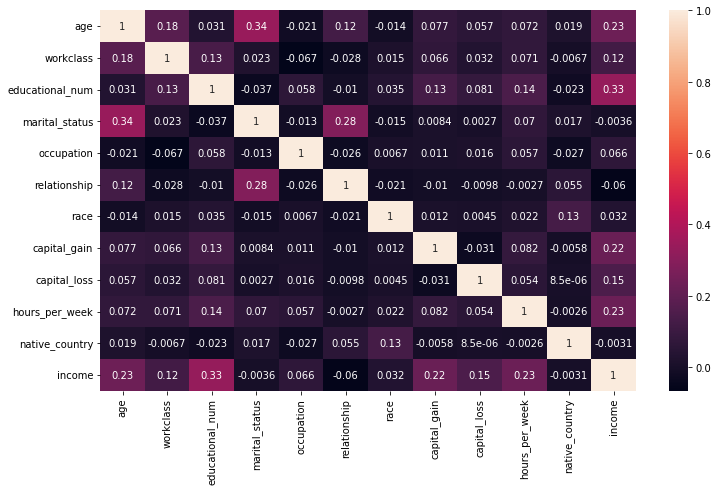

In [7]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [8]:
x = data.drop('income', axis=1)
x

,age,workclass,educational_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country
0,25,0,7,0,0,0,0,0,0,40,0
1,38,0,9,1,1,1,1,0,0,50,0
2,28,1,12,1,2,1,1,0,0,40,0
3,44,0,10,1,0,1,0,7688,0,40,0
4,18,2,10,0,3,0,1,0,0,30,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,27,0,12,1,9,4,1,0,0,38,0
48838,40,0,9,1,0,1,1,0,0,40,0
48839,58,0,9,2,7,3,1,0,0,40,0
48840,22,0,9,0,7,0,1,0,0,20,0


In [9]:
y = data['income']
y

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

print('Train features  :', x_train.shape)
print('Train labels    :', y_train.shape)
print('\nTest features   :', x_test.shape)
print('Test labels     :', y_test.shape)

Train features  : (39073, 11)
Train labels    : (39073,)

Test features   : (9769, 11)
Test labels     : (9769,)


## KNN Classifier

In [11]:
knn = KNeighborsClassifier().fit(x_train, y_train)

### Evaluation

In [12]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

C:\Users\ikath\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\ikath\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


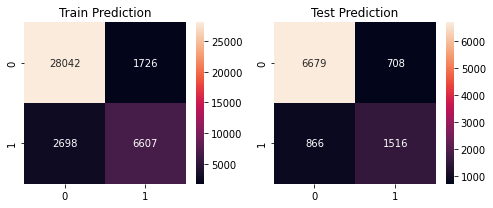

In [13]:
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))

ax1.title.set_text("Train Prediction")
sns.heatmap(cm_train, annot=True, fmt="d", ax=ax1)

ax2.title.set_text("Test Prediction")
sns.heatmap(cm_test, annot=True, fmt="d", ax=ax2)

plt.tight_layout()
plt.show()

In [14]:
print('Accurcy of model : %.3f %%' % (knn.score(x_test, y_test)*100))
print('\nPrecision score : %.3f %%' % precision_score(y_test, y_pred_test, average='weighted'))
print('Recall score : %.3f %%' % recall_score(y_test, y_pred_test, average='weighted'))
print('f1 score : %.3f %%' % f1_score(y_test, y_pred_test, average='weighted'))

C:\Users\ikath\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accurcy of model : 83.888 %

Precision score : 0.836 %
Recall score : 0.839 %
f1 score : 0.837 %
